# IMPORT OF PACKAGES

In [1]:
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
#np.random.seed(seed)

import logging

import random
random.seed(42)

In [2]:
!pip install -U tensorflow==2.14.0
import tensorflow as tf
tf.__version__

  Obtaining dependency information for tensorflow==2.14.0 from https://files.pythonhosted.org/packages/e2/7a/c7762c698fb1ac41a7e3afee51dc72aa3ec74ae8d2f57ce19a9cded3a4af/tensorflow-2.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for ml-dtypes==0.2.0 from https://files.pythonhosted.org/packages/d1/1d/d5cf76e5e40f69dbd273036e3172ae4a614577cb141673427b80cac948df/ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.2 MB/s eta 0:00:00
  Obtaining dependency information for tensorboard<2.15,>=2.14 from https://files.pythonhosted.org/packages/73/a2/66ed644f6ed1562e0285fcd959af17670ea313c8f331c46f79ee77187eb9/tensorboard-2.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow-estimator<2.15,>=2.14.0 from https://files.pythonhosted.org/packages/d1/da/4f264c196325bb6e37a6285caec5b12a03def489b57cc1fdac02bb6272cd/tensor

'2.14.0'

In [4]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from tensorflow.keras import initializers
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.14.0


In [5]:
# Import other libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.utils import class_weight
import seaborn as sns

In [6]:
TRAIN_DIR="/kaggle/input/notebookdbd36529ff/data/training_folder"
VAL_DIR="/kaggle/input/notebookdbd36529ff/data/validation_folder"
TEST_DIR="/kaggle/input/notebookdbd36529ff/data/test_folder"
IMG_SHAPE=(96,96)
BATCH_SIZE=32

# IMPORT IMAGES FROM DIRECTORY


In [7]:
import glob
import cv2

In [8]:
training_h='/kaggle/input/notebookdbd36529ff/data/training_folder/healthy/*.jpg'
training_un='/kaggle/input/notebookdbd36529ff/data/training_folder/unhealthy/*.jpg'
validation_h='/kaggle/input/notebookdbd36529ff/data/validation_folder/healthy/*.jpg'
validation_un='/kaggle/input/notebookdbd36529ff/data/validation_folder/unhealthy/*.jpg'
test_h='/kaggle/input/notebookdbd36529ff/data/test_folder/healthy/*.jpg'
test_un='/kaggle/input/notebookdbd36529ff/data/test_folder/unhealthy/*.jpg'

obj_tr_h=glob.glob(training_h)
obj_tr_un=glob.glob(training_un)
obj_val_h=glob.glob(validation_h)
obj_val_un=glob.glob(validation_un)
obj_ts_h=glob.glob(test_h)
obj_ts_un=glob.glob(test_un)

In [9]:
y_train_h=[]

y_train_unh=[]

x_train=[]

y_train=[]

x_train_h=[]

x_train_unh=[]

for el in obj_tr_h:
    im=cv2.cvtColor(cv2.imread(el), cv2.COLOR_BGR2RGB)
    x_train_h.append(im)
    x_train.append(im)
    y_train.append([np.float32(0)])
    y_train_h.append(np.array([float(1) , float(0) ]))
    

    
for el in obj_tr_un:
    im=cv2.cvtColor(cv2.imread(el), cv2.COLOR_BGR2RGB)
    x_train_unh.append(im)
    x_train.append(im)
    y_train.append([np.float32(1)])
    y_train_unh.append(np.array([float(0),float(1)]) )  
    

    
    
shuffle_indexes=np.arange(len(y_train))
#np.random.seed=seed
np.random.shuffle(shuffle_indexes)

#x_train_h=np.array(x_train_h)
#y_train_h=np.array(y_train_h)

#x_train_unh=np.array(x_train_unh)
#y_train_unh=np.array(y_train_unh)

x_train=np.array(x_train)
y_train=np.array(y_train)

x_train=x_train[shuffle_indexes]
y_train=y_train[shuffle_indexes]
    

In [10]:
x_train_h[0].shape
y_train_h[0]

array([1., 0.])

In [11]:
y_val=[]


x_val=[]

for el in obj_val_h:
    im=cv2.cvtColor(cv2.imread(el), cv2.COLOR_BGR2RGB)
    x_val.append(im)
    y_val.append([np.float32(0)])

    
for el in obj_val_un:
    im=cv2.cvtColor(cv2.imread(el), cv2.COLOR_BGR2RGB)
    x_val.append(im)
    y_val.append([np.float32(1)])    

    
shuffle_indexes=np.arange(len(y_val))
np.random.seed=seed
np.random.shuffle(shuffle_indexes)

x_val=np.array(x_val)
y_val=np.array(y_val)


x_val=x_val[shuffle_indexes]
y_val=y_val[shuffle_indexes]


# CHECK HEALTHY/UNHEALTHY IMAGES


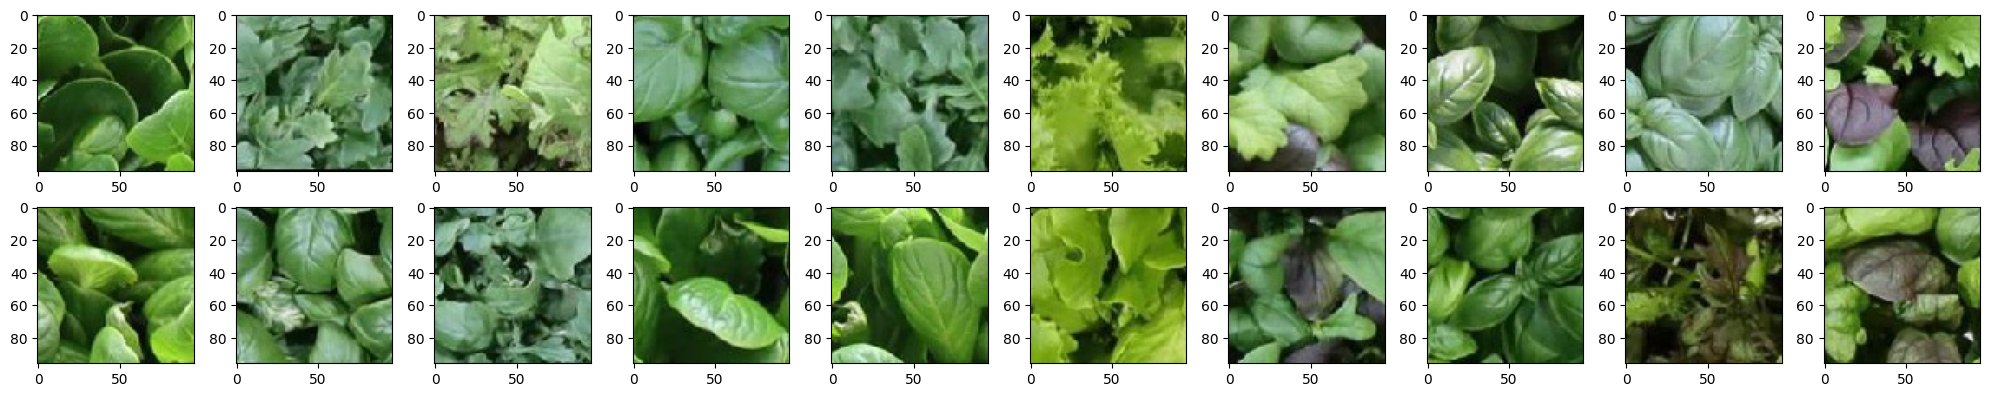

In [12]:
num_img=10

fig, axes = plt.subplots(2, num_img, figsize=(20,4))
for i in range(num_img):
    ax = axes[0,i%num_img]
    ax.imshow(x_train_h[i]/255)
    ax = axes[1,i%num_img]
    ax.imshow(np.clip(x_train_unh[i]/255, 0, 1))
plt.tight_layout()
plt.show()

In [13]:
y_test=[]


x_test=[]

for el in obj_ts_h:
    im=cv2.cvtColor(cv2.imread(el), cv2.COLOR_BGR2RGB)
    x_test.append(im)
    y_test.append([np.float32(0)])

    
for el in obj_ts_un:
    im=cv2.cvtColor(cv2.imread(el), cv2.COLOR_BGR2RGB)
    x_test.append(im)
    y_test.append([np.float32(1)])    

    
shuffle_indexes=np.arange(len(y_test))
np.random.seed=seed
np.random.shuffle(shuffle_indexes)

x_test=np.array(x_test)
y_test=np.array(y_test)


x_test=x_test[shuffle_indexes]
y_test=y_test[shuffle_indexes]


In [14]:
x_train=np.append(x_train,x_test,axis=0)
y_train=np.append(y_train,y_test)
print(x_train.shape)
print(y_train.shape)

(4231, 96, 96, 3)
(4231,)


In [15]:
print(len(x_train_h))
print(len(x_train_unh))
print(len(y_train_h))
print(len(y_train_unh))

print(x_val.shape)
print(y_val.shape)

2210
1293
2210
1293
(619, 96, 96, 3)
(619, 1)


In [16]:
x_train.shape , y_train.shape  ,  x_val.shape  ,  y_val.shape


((4231, 96, 96, 3), (4231,), (619, 96, 96, 3), (619, 1))

# DATA AUGMENTATION


In [18]:
y_val = tf.keras.utils.to_categorical(y_val, num_classes=2)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)

In [19]:
y_train.shape

(4231, 2)

In [20]:
import keras_cv as kcv

Using TensorFlow backend


In [21]:
def orthogonal_rot(image):
    image=tfkl.RandomContrast(0.3)(image)
    image=kcv.layers.RandomColorDegeneration(0.25)(image)
    return np.rot90(image, np.random.choice([-1, 0, 1,2]))

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train generator with augmentation
train_image_gen  = ImageDataGenerator(
    #rotation_range=20,
    brightness_range=(0.85,1.15),
    zoom_range=(1,1.25),
    channel_shift_range=10,
    fill_mode='reflect',
    #shear_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=orthogonal_rot,
)                                      

train_dataset = train_image_gen.flow(x_train,y_train ,batch_size=64, shuffle=True)


val_generator=ImageDataGenerator()

val_dataset = val_generator.flow(x_val,y_val ,batch_size=64, shuffle=False)



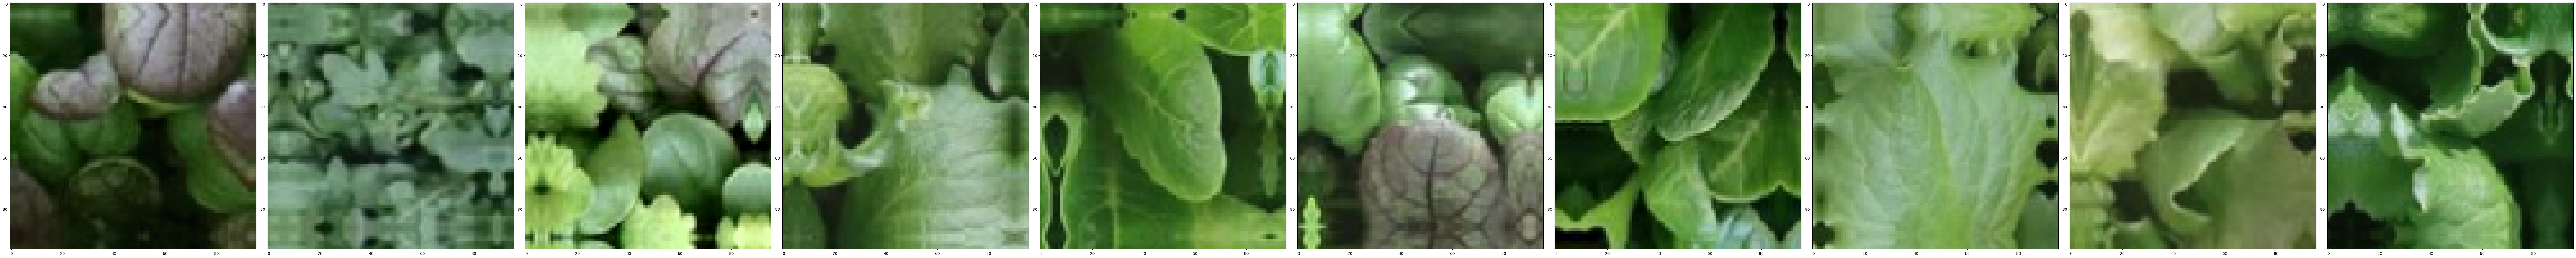

In [50]:
num_img = 10
fig, axes = plt.subplots(1, num_img, figsize=(96, 96))

# Iterate through the selected number of images
for i in range(num_img):
    ax = axes[i % num_img]
    ax.imshow(train_dataset[0][0][i]/255)
 
# Adjust layout and display the images
plt.tight_layout()
plt.show()

# MODEL BUILDING  - CONVNEXT

In [22]:
from tensorflow.keras.applications.convnext  import preprocess_input



pretrained_model  = tfk.applications.ConvNeXtTiny (
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224,3),
)
pretrained_model.trainable = False


111650432/111650432 [==============================] - 5s 0us/step


#### Use the test to compute class weights, just because it has the same class distribution of the training (stratified split)

In [25]:

train_image_gen  = ImageDataGenerator()                                      

test_dataset = train_image_gen.flow_from_directory(directory=TEST_DIR,
                                                    target_size=IMG_SHAPE,
                                                   # color_mode='rgb',
                                                    classes=None,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=False,
                                                    
                                                    )

Found 728 images belonging to 2 classes.


In [26]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(test_dataset.classes),
                                                  y=test_dataset.classes)

class_weights = dict(zip(np.unique(test_dataset.classes), class_weights))
class_weights

{0: 0.7930283224400871, 1: 1.3531598513011152}

In [27]:


inputs = tfk.Input(shape=(96, 96, 3))
x = tfkl.Resizing(224, 224, interpolation='bicubic', name='resizing')(inputs)


x = preprocess_input(x)

x = pretrained_model(x)

x=tfkl.BatchNormalization()(x)

x = tfkl.GlobalAveragePooling2D()(x)
x = tfkl.Dropout(0.3)(x)


x=tfkl.Dense(128 , kernel_initializer=tfk.initializers.GlorotNormal() , kernel_regularizer=tfk.regularizers.l2(0.5) )(x)
x=tfkl.BatchNormalization()(x)
x=tfkl.Activation("gelu")(x)

x=tfkl.Dropout(0.3)(x)


outputs = tfkl.Dense(2, activation='softmax', kernel_initializer=tfk.initializers.GlorotNormal() ,  kernel_regularizer=tfk.regularizers.l2(0.5) )(x)

# Create a Model connecting input and output
tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='convnext')

# Compile the model with Categorical Cross-Entropy loss and Adam optimizer
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Display model summary
tl_model.summary()

Model: "convnext"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 convnext_tiny (Functional)  (None, 7, 7, 768)         27820128  
                                                                 
 batch_normalization (Batch  (None, 7, 7, 768)         3072      
 Normalization)                                                  
                                                                 
 global_average_pooling2d (  (None, 768)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 768)               0  

# TRAIN THE CLASSIFIER

In [55]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    '/kaggle/working/best_fine_tuned_model.h5',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

In [56]:
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate=10**-3), metrics=['accuracy'])

In [57]:
# Train the model
tl_history = tl_model.fit(
    train_dataset,

    epochs = 15,
    validation_data = val_dataset,
    class_weight=class_weights,
   callbacks = [ model_checkpoint]
).history

Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 43.5264 - accuracy: 0.6207
Epoch 1: val_loss improved from inf to 9.48558, saving model to /kaggle/working/best_fine_tuned_model.h5
67/67 [==============================] - 101s 1s/step - loss: 43.5264 - accuracy: 0.6207 - val_loss: 9.4856 - val_accuracy: 0.6397
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 3.9858 - accuracy: 0.7152
Epoch 2: val_loss improved from 9.48558 to 1.66342, saving model to /kaggle/working/best_fine_tuned_model.h5
67/67 [==============================] - 82s 1s/step - loss: 3.9858 - accuracy: 0.7152 - val_loss: 1.6634 - val_accuracy: 0.7027
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 1.1261 - accuracy: 0.7417
Epoch 3: val_loss improved from 1.66342 to 0.99983, saving model to /kaggle/working/best_fine_tuned_model.h5
67/67 [==============================] - 83s 1s/step - loss: 1.1261 - accuracy: 0.7417 - val_loss: 0.9998 - val_accuracy: 0.7011
Epoch

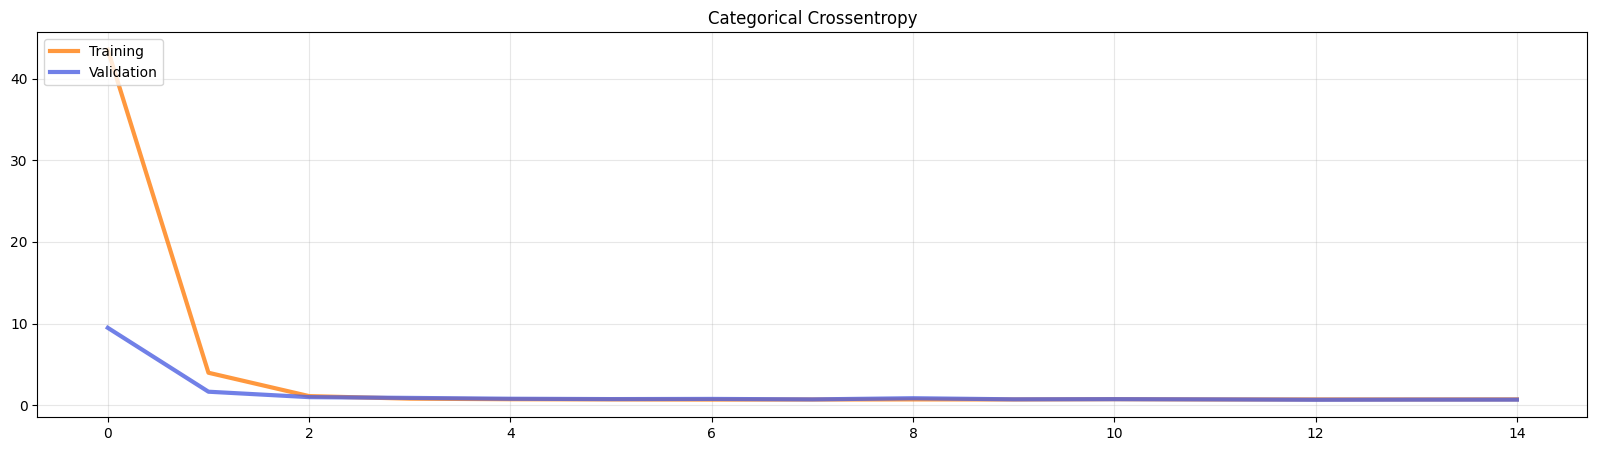

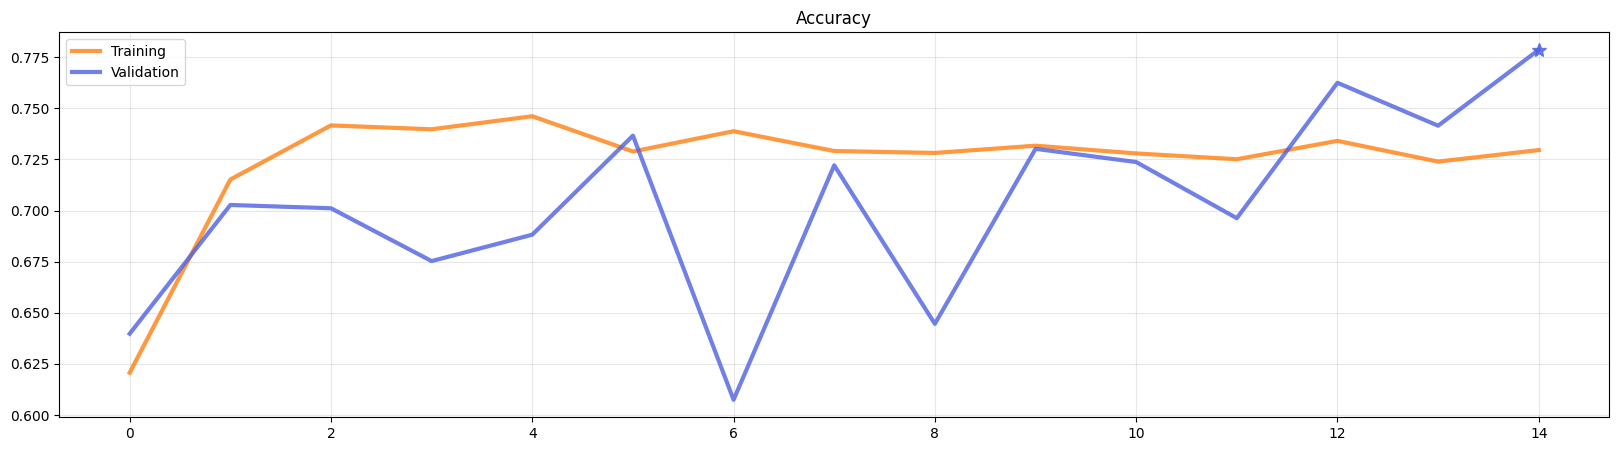

In [58]:
# Find the epoch with the highest validation accuracy

history=tl_history
best_epoch = np.argmax(history['val_accuracy'])

# Plot training and validation performance metrics
plt.figure(figsize=(20, 5))

# Plot training and validation loss
plt.plot(history['loss'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=3)
plt.plot(history['val_loss'], label='Validation', alpha=0.8, color='#4D61E2', linewidth=3)
plt.legend(loc='upper left')
plt.title('Categorical Crossentropy')
plt.grid(alpha=0.3)

plt.figure(figsize=(20, 5))

# Plot training and validation accuracy, highlighting the best epoch
plt.plot(history['accuracy'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=3)
plt.plot(history['val_accuracy'], label='Validation', alpha=0.8, color='#4D61E2', linewidth=3)
plt.plot(best_epoch, history['val_accuracy'][best_epoch], marker='*', alpha=0.8, markersize=10, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=0.3)

plt.show()

In [68]:
tl_model.load_weights('/kaggle/working/best_fine_tuned_model.h5')

# FIRST FINE TUNING

In [69]:
pretrained_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(pretrained_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 135

# Freeze all the layers before the `fine_tune_at` layer
for layer in pretrained_model.layers[:fine_tune_at]:
    layer.trainable =  False

# Define a BinaryCrossentropy loss function. Use from_logits=True
loss_function = tf.keras.losses.CategoricalCrossentropy()

# Define an Adam optimizer with a learning rate of 0.1 * base_learning_rate
optimizer = tf.keras.optimizers.Adam(0.00005)

# Use accuracy as evaluation metric
metrics = ['accuracy']

learning_rate= 1e-4 #0.1 * base_learning_rate

# Compile the model
tl_model.compile(optimizer=optimizer,
              loss=loss_function,
              metrics=metrics)

tl_model.summary()

Number of layers in the base model:  151
Model: "convnext"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 convnext_tiny (Functional)  (None, 7, 7, 768)         27820128  
                                                                 
 batch_normalization_2 (Bat  (None, 7, 7, 768)         3072      
 chNormalization)                                                
                                                                 
 global_average_pooling2d_1  (None, 768)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropo

In [70]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    '/kaggle/working/best_fine_tuned_model_1.h5',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

In [71]:
history_fine = tl_model.fit(train_dataset,
                         epochs=25,
                         initial_epoch=15,
                         validation_data=val_dataset,
                         callbacks=model_checkpoint,
                         class_weight = class_weights  
                        )

Epoch 16/25
67/67 [==============================] - ETA: 0s - loss: 0.6355 - accuracy: 0.7573
Epoch 16: val_loss improved from inf to 0.58689, saving model to /kaggle/working/best_fine_tuned_model_1.h5
67/67 [==============================] - 100s 1s/step - loss: 0.6355 - accuracy: 0.7573 - val_loss: 0.5869 - val_accuracy: 0.7658
Epoch 17/25
67/67 [==============================] - ETA: 0s - loss: 0.5568 - accuracy: 0.7922
Epoch 17: val_loss improved from 0.58689 to 0.54413, saving model to /kaggle/working/best_fine_tuned_model_1.h5
67/67 [==============================] - 86s 1s/step - loss: 0.5568 - accuracy: 0.7922 - val_loss: 0.5441 - val_accuracy: 0.7835
Epoch 18/25
67/67 [==============================] - ETA: 0s - loss: 0.5201 - accuracy: 0.8057
Epoch 18: val_loss improved from 0.54413 to 0.51622, saving model to /kaggle/working/best_fine_tuned_model_1.h5
67/67 [==============================] - 86s 1s/step - loss: 0.5201 - accuracy: 0.8057 - val_loss: 0.5162 - val_accuracy: 0.

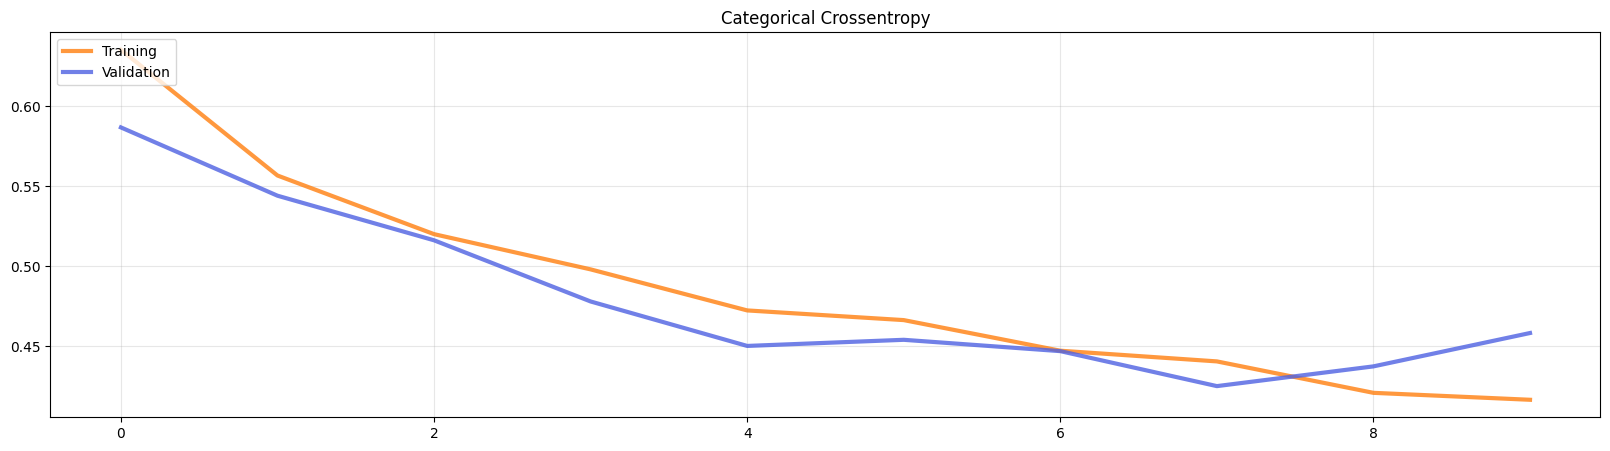

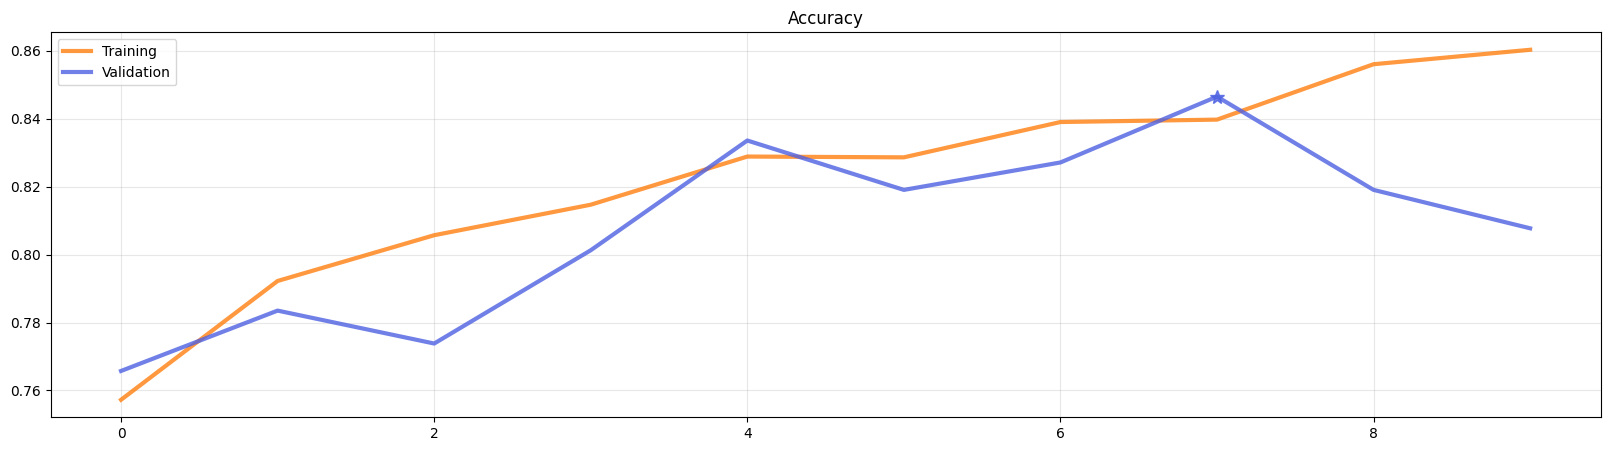

In [72]:
# Find the epoch with the highest validation accuracy

history=history_fine.history
best_epoch = np.argmax(history['val_accuracy'])

# Plot training and validation performance metrics
plt.figure(figsize=(20, 5))

# Plot training and validation loss
plt.plot(history['loss'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=3)
plt.plot(history['val_loss'], label='Validation', alpha=0.8, color='#4D61E2', linewidth=3)
plt.legend(loc='upper left')
plt.title('Categorical Crossentropy')
plt.grid(alpha=0.3)

plt.figure(figsize=(20, 5))

# Plot training and validation accuracy, highlighting the best epoch
plt.plot(history['accuracy'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=3)
plt.plot(history['val_accuracy'], label='Validation', alpha=0.8, color='#4D61E2', linewidth=3)
plt.plot(best_epoch, history['val_accuracy'][best_epoch], marker='*', alpha=0.8, markersize=10, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=0.3)

plt.show()

# SECOND FINE TUNING

In [73]:
pretrained_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(pretrained_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 120

# Freeze all the layers before the `fine_tune_at` layer
for layer in pretrained_model.layers[:fine_tune_at]:
    layer.trainable =  False

# Define a BinaryCrossentropy loss function. Use from_logits=True
loss_function = tf.keras.losses.CategoricalCrossentropy()

# Define an Adam optimizer with a learning rate of 0.1 * base_learning_rate
optimizer = tf.keras.optimizers.Adam(0.00005)

# Use accuracy as evaluation metric
metrics = ['accuracy']

#learning_rate= 1e-4 #0.1 * base_learning_rate

# Compile the model
tl_model.compile(optimizer=optimizer,
              loss=loss_function,
              metrics=metrics)

Number of layers in the base model:  151


In [74]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    '/kaggle/working/best_fine_tuned_model_2.h5',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

In [75]:
history_fine = tl_model.fit(train_dataset,
                         epochs=35,
                         initial_epoch=25,
                         validation_data=val_dataset,
                         callbacks=model_checkpoint,
                         class_weight = class_weights  
                        )

Epoch 26/35
67/67 [==============================] - ETA: 0s - loss: 0.4083 - accuracy: 0.8608
Epoch 26: val_loss improved from inf to 0.42791, saving model to /kaggle/working/best_fine_tuned_model_2.h5
67/67 [==============================] - 101s 1s/step - loss: 0.4083 - accuracy: 0.8608 - val_loss: 0.4279 - val_accuracy: 0.8433
Epoch 27/35
67/67 [==============================] - ETA: 0s - loss: 0.3938 - accuracy: 0.8695
Epoch 27: val_loss improved from 0.42791 to 0.40987, saving model to /kaggle/working/best_fine_tuned_model_2.h5
67/67 [==============================] - 87s 1s/step - loss: 0.3938 - accuracy: 0.8695 - val_loss: 0.4099 - val_accuracy: 0.8481
Epoch 28/35
67/67 [==============================] - ETA: 0s - loss: 0.3780 - accuracy: 0.8771
Epoch 28: val_loss improved from 0.40987 to 0.39851, saving model to /kaggle/working/best_fine_tuned_model_2.h5
67/67 [==============================] - 88s 1s/step - loss: 0.3780 - accuracy: 0.8771 - val_loss: 0.3985 - val_accuracy: 0.

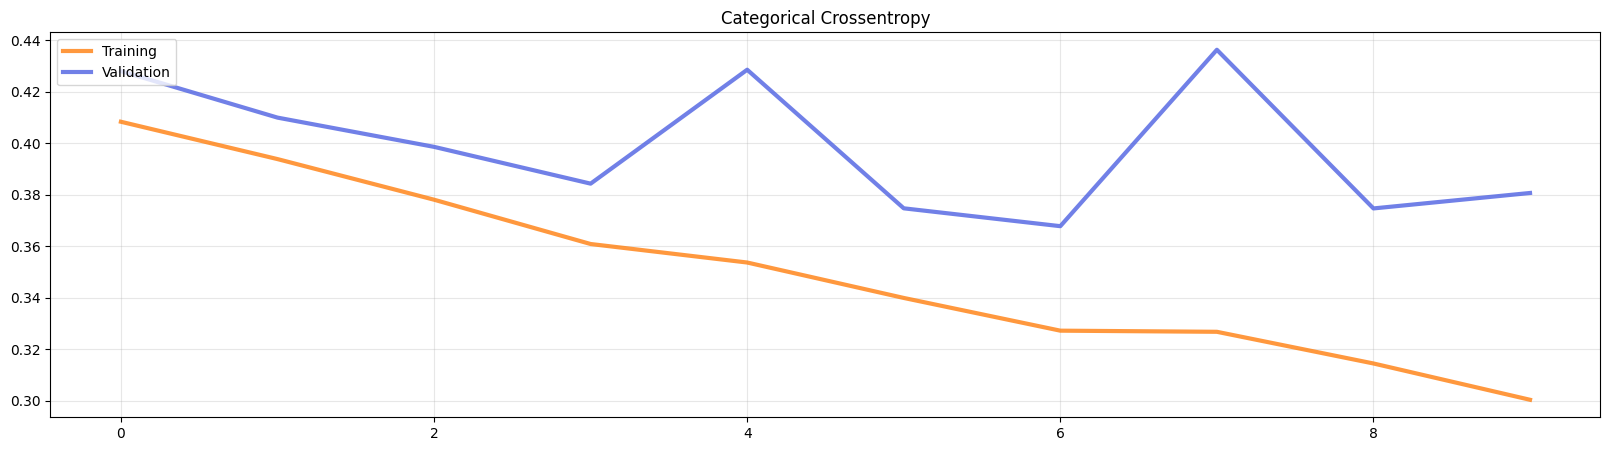

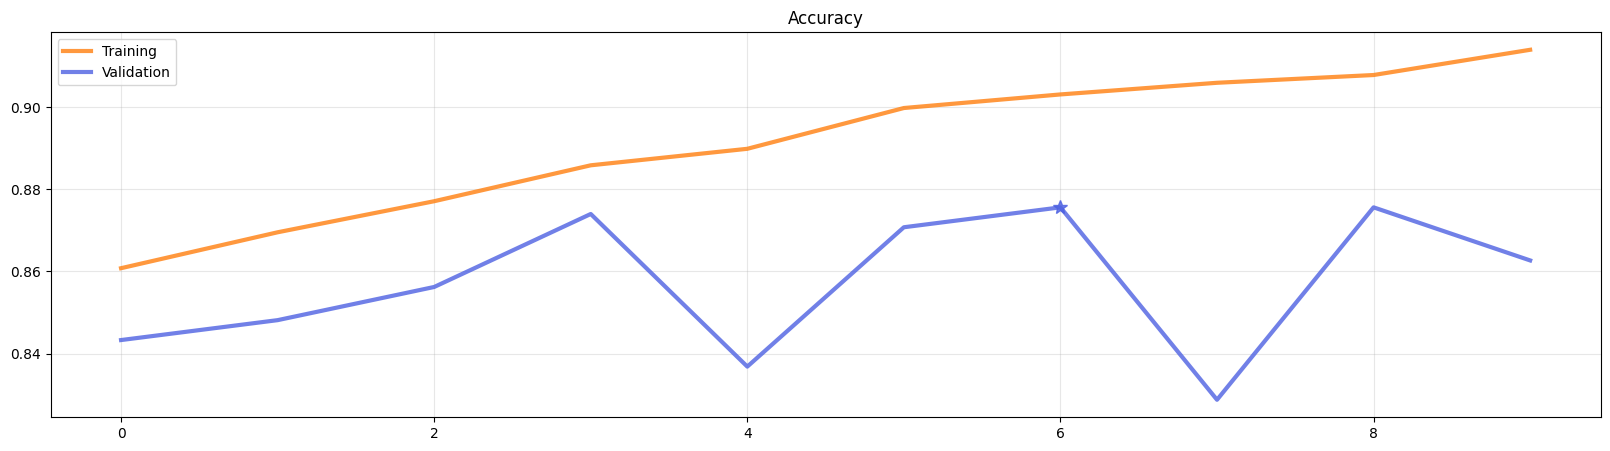

In [76]:
# Find the epoch with the highest validation accuracy

history=history_fine.history
best_epoch = np.argmax(history['val_accuracy'])

# Plot training and validation performance metrics
plt.figure(figsize=(20, 5))

# Plot training and validation loss
plt.plot(history['loss'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=3)
plt.plot(history['val_loss'], label='Validation', alpha=0.8, color='#4D61E2', linewidth=3)
plt.legend(loc='upper left')
plt.title('Categorical Crossentropy')
plt.grid(alpha=0.3)

plt.figure(figsize=(20, 5))

# Plot training and validation accuracy, highlighting the best epoch
plt.plot(history['accuracy'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=3)
plt.plot(history['val_accuracy'], label='Validation', alpha=0.8, color='#4D61E2', linewidth=3)
plt.plot(best_epoch, history['val_accuracy'][best_epoch], marker='*', alpha=0.8, markersize=10, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=0.3)

plt.show()

# THIRD FINE TUNING (10 EPOCHS TOTAL)

In [28]:
pretrained_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(pretrained_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 105

# Freeze all the layers before the `fine_tune_at` layer
for layer in pretrained_model.layers[:fine_tune_at]:
    layer.trainable =  False

# Define a BinaryCrossentropy loss function. Use from_logits=True
loss_function = tf.keras.losses.CategoricalCrossentropy()

# Define an Adam optimizer with a learning rate of 0.1 * base_learning_rate
optimizer = tf.keras.optimizers.Adam(0.00001)

# Use accuracy as evaluation metric
metrics = ['accuracy']

#learning_rate= 1e-4 #0.1 * base_learning_rate

# Compile the model
tl_model.compile(optimizer=optimizer,
              loss=loss_function,
              metrics=metrics)

Number of layers in the base model:  151


In [80]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    '/kaggle/working/best_fine_tuned_model_3.h5',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

In [82]:
history_fine = tl_model.fit(train_dataset,
                         epochs=45,
                         initial_epoch=40,
                         validation_data=val_dataset,
                         callbacks=model_checkpoint,
                         class_weight = class_weights  
                        )

Epoch 41/45
67/67 [==============================] - ETA: 0s - loss: 0.2730 - accuracy: 0.9336
Epoch 41: val_loss did not improve from 0.37308
67/67 [==============================] - 89s 1s/step - loss: 0.2730 - accuracy: 0.9336 - val_loss: 0.3766 - val_accuracy: 0.8708
Epoch 42/45
67/67 [==============================] - ETA: 0s - loss: 0.2644 - accuracy: 0.9341
Epoch 42: val_loss improved from 0.37308 to 0.36718, saving model to /kaggle/working/best_fine_tuned_model_3.h5
67/67 [==============================] - 89s 1s/step - loss: 0.2644 - accuracy: 0.9341 - val_loss: 0.3672 - val_accuracy: 0.8708
Epoch 43/45
67/67 [==============================] - ETA: 0s - loss: 0.2698 - accuracy: 0.9343
Epoch 43: val_loss did not improve from 0.36718
67/67 [==============================] - 89s 1s/step - loss: 0.2698 - accuracy: 0.9343 - val_loss: 0.3810 - val_accuracy: 0.8724
Epoch 44/45
67/67 [==============================] - ETA: 0s - loss: 0.2612 - accuracy: 0.9416
Epoch 44: val_loss did no

In [41]:
tl_model.load_weights('/kaggle/input/weights/CONVNEXT_no_mixup.h5')

In [42]:
tl_model.save('/kaggle/working/ConvNext_no_mixup')

In [38]:
predictions=tl_model.predict(val_dataset)
y_pred=np.argmax(predictions, axis=1)
out = tf.convert_to_tensor(y_pred)
y_true=y_val[:,1]


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Recall:", recall)

10/10 [==============================] - 3s 318ms/step
Confusion Matrix:
[[352  39]
 [ 33 195]]
Accuracy: 0.8836833602584814
Precision: 0.8333333333333334
F1 Score: 0.8441558441558442
Recall: 0.8552631578947368


In [43]:
def orthogonal_rot_tta(image):
    image=tfkl.RandomContrast(0.3)(image)
    #image=kcv.layers.RandomColorDegeneration(0.25)(image)
    return np.rot90(image, np.random.choice([-1, 0, 1,2]))

In [51]:
def TTA(model,data):
    
    
        test_datagen = ImageDataGenerator(
                    #rotation_range=20,
    brightness_range=(0.85,1.2),
    zoom_range=(1,1.25),
    channel_shift_range=8,
    fill_mode='reflect',
    #shear_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=orthogonal_rot_tta,
        )
        
        y_hats=[]
        
        n_steps=10
        BATCH=32
        
        for i in range(n_steps):
            preds=model.predict_generator(test_datagen.flow(data,batch_size=BATCH,shuffle=False),

                                      steps=len(data)/BATCH)
            y_hats.append(preds)
        
        y_hats=np.array(y_hats)
        pred=np.mean(y_hats,axis=0)
        results=np.argmax(pred,axis=1)
        #results = results.flatten()
        return results
        

In [53]:
results=TTA(tl_model,x_val)
y_pred=results
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Recall:", recall)

Confusion Matrix:
[[362  29]
 [ 31 197]]
Accuracy: 0.9030694668820679
Precision: 0.8716814159292036
F1 Score: 0.8678414096916299
Recall: 0.8640350877192983
